##### The task is to conduct exploratory data analysis of the churn dataset as provided in bank_churn.csv file. This dataset containing demographics and financial records of their clients, which are randomly query from their database system from three countries.

## Load Packages

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#Import Dataset

df = pd.read_csv('bank_churn.csv')

df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,101348.88,Churn
1,608,Spain,Female,41,83807.86,1,0,112542.58,Stay
2,502,France,Female,42,159660.80,3,1,113931.57,Churn
3,699,France,Female,39,0.00,2,0,93826.63,Stay
4,850,Spain,Female,43,125510.82,1,1,79084.10,Stay


In [3]:
#Check Total Number of Rows or Columns
df.shape

(10000, 9)

In [4]:
#Check columns
df.columns.tolist()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'EstimatedSalary',
 'Exited']

In [5]:
#Check Data Type for each variable

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
EstimatedSalary    float64
Exited              object
dtype: object

In [6]:
#dataset info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 703.3+ KB


## Data Cleaning

In [7]:
#Check Missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Exited             0
dtype: int64

#### No missing values

## Dataset Overall Information

In [8]:
# describe dataset

df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


## Class's proportion of Exited, Gender and Geography.

In [9]:
# Check class proportions

class_proportions = df['Exited'].value_counts(normalize=True).round(2)
gender_proportions = df['Gender'].value_counts(normalize=True).round(2)
geography_proportions = df['Geography'].value_counts(normalize=True).round(2)

print('Exited Class Proportions:')
print(class_proportions)

print('\nGender Proportions:')
print(gender_proportions)

print('\nGeography Proportions:')
print(geography_proportions)


Exited Class Proportions:
Exited
Stay     0.8
Churn    0.2
Name: proportion, dtype: float64

Gender Proportions:
Gender
Male      0.55
Female    0.45
Name: proportion, dtype: float64

Geography Proportions:
Geography
France     0.50
Germany    0.25
Spain      0.25
Name: proportion, dtype: float64


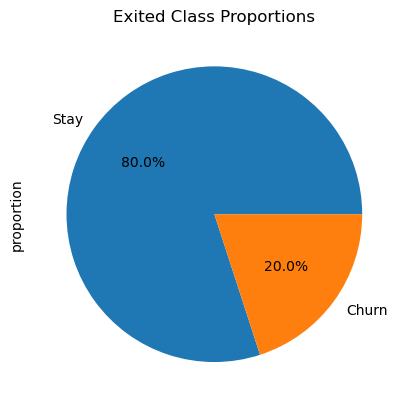

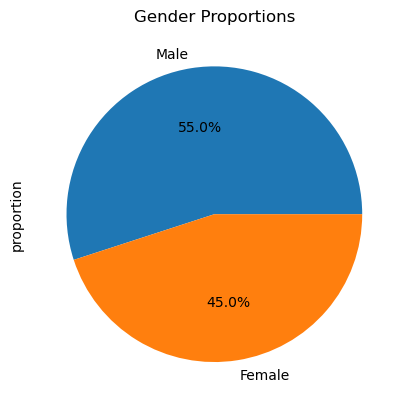

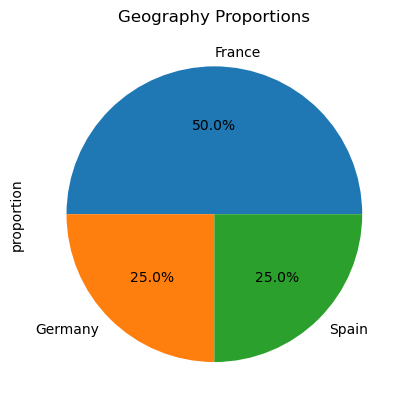

In [10]:
#plot pie chart for better understanding

class_proportions.plot(kind='pie',autopct='%.1f%%')
plt.title('Exited Class Proportions')
plt.show()

gender_proportions.plot(kind='pie',autopct='%.1f%%')
plt.title('Gender Proportions')
plt.show()


geography_proportions.plot(kind='pie',autopct='%.1f%%')
plt.title('Geography Proportions')
plt.show()


## Mean, median, and standard deviation of CreditScore and Age.

In [11]:
# Compute mean, median, and standard deviation
credit_score_stats = df['CreditScore'].describe().round(2)
age_stats = df['Age'].describe().round(2)

print("\nCreditScore Statistics:")
print(credit_score_stats)

print("\nAge Statistics:")
print(age_stats)



CreditScore Statistics:
count    10000.00
mean       650.53
std         96.65
min        350.00
25%        584.00
50%        652.00
75%        718.00
max        850.00
Name: CreditScore, dtype: float64

Age Statistics:
count    10000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: Age, dtype: float64


In [12]:
median_credit_score = df['CreditScore'].median()
median_age = df['Age'].median()

print(f"Median CreditScore: {median_credit_score}")
print(f"Median Age: {median_age}")

Median CreditScore: 652.0
Median Age: 37.0


## Distribution of CreditScore and Age.

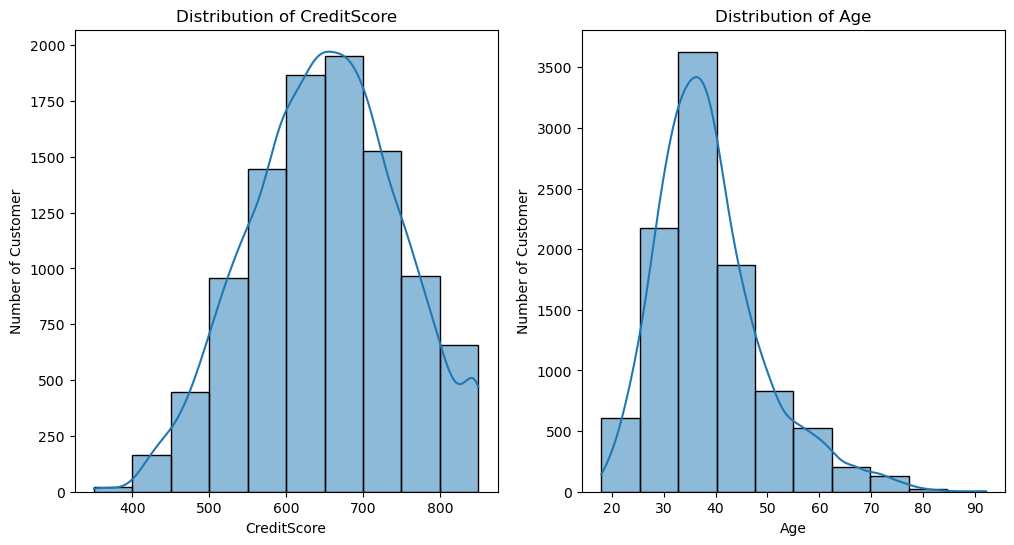

In [13]:
# Plot distribution of CreditScore and Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['CreditScore'], bins=10, kde=True)
plt.ylabel('Number of Customer')
plt.title('Distribution of CreditScore')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=10, kde=True)
plt.ylabel('Number of Customer')
plt.title('Distribution of Age')

plt.show()


In [14]:
#Calculation of Skewness
from scipy.stats import skew

skew(df['Age'], bias=True)

1.0111685586628079

In [15]:
#Calculation of Skewness
from scipy.stats import skew

skew(df['CreditScore'], bias=True)


-0.07159586676212397

 Based on the graph above, we can conclude that the distribution for CreditScore is normal where most of the data points cluster around the mean, with fewer and fewer appearing as you move away from the mean. While for distribution for Age, the graph produced right skewed distribution,In other words, the majority of the data points are concentrated on the left side of the distribution, and there are relatively fewer data points on the right side.

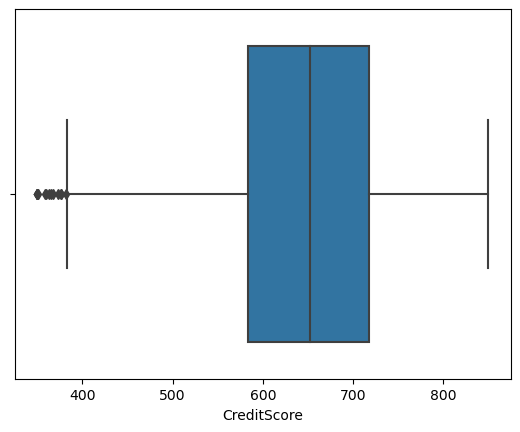

In [16]:
#Box Plot CreditScore
sns.boxplot(x='CreditScore',data=df)
plt.show()

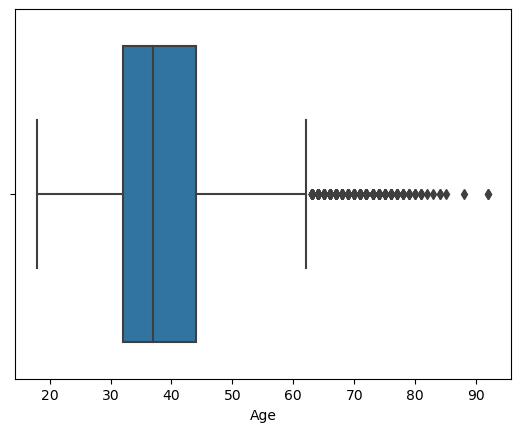

In [17]:
#Box Plot Age
sns.boxplot(x='Age',data=df)
plt.show()

## The churn rate of the clients.

In [18]:
# Calculate the number of churned clients
num_churned = df[df['Exited'] == 'Churn'].shape[0]

# Calculate the total number of clients
total_clients = df.shape[0]

# Calculate the churn rate
churn_rate = (num_churned / total_clients) * 100

# Print the churn rate
print(f"The churn rate is: {churn_rate}%")


The churn rate is: 20.369999999999997%


## Correlation between CreditScore and Age

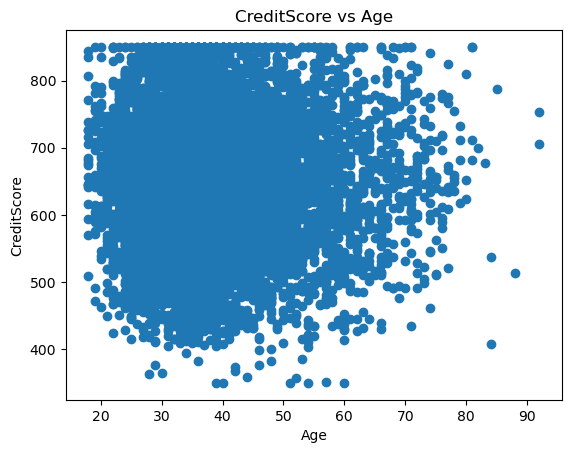

In [19]:
#Scatter plot CreditScore vs Age

plt.scatter(df['Age'],df['CreditScore'])
plt.title('CreditScore vs Age')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()

In [20]:
# Check correlation
correlation = df['CreditScore'].corr(df['Age'])
print(f"The correlation is: {correlation}")


The correlation is: -0.00396490552539007


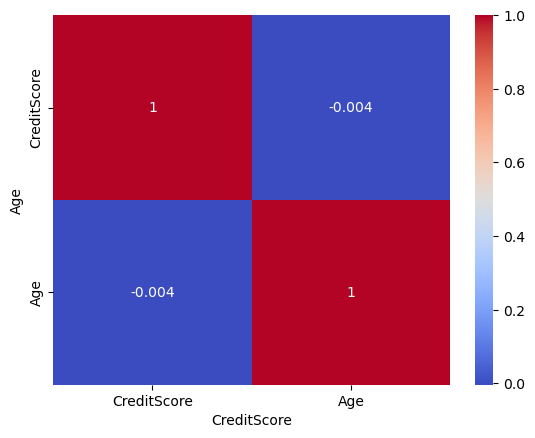

In [21]:
# Create a heatmap
heatmap_data = df[['CreditScore', 'Age']]
correlation = heatmap_data.corr()

sns.heatmap(correlation,annot=True, cmap='coolwarm')

# Set plot labels and title
plt.xlabel('CreditScore')
plt.ylabel('Age')


# Show the plot
plt.show()


 A correlation coefficient of -0.00396490552539007 between CreditScore and Age, indicates a very weak or negligible linear relationship between them. The sign of the correlation coefficient indicates the direction of the relationship, while the magnitude reflects the strength. The negative sign (-) indicates a negative correlation, meaning that CreditScore increases, the other variable which is Age tends to decrease, and vice versa.

## The churn rate based on Geography.

In [22]:
#Count the Churn rate based on Country
ext_geo = pd.crosstab(index=df['Geography'], columns=df['Exited'])
ext_geo

Exited,Churn,Stay
Geography,,
France,810,4204
Germany,814,1695
Spain,413,2064


In [23]:
#Calculate Percentage of Georaphy based on Exited
crossTab_percentage = pd.crosstab(index=df['Geography'], columns=df['Exited'], normalize='index')*100
crossTab_percentage.round()


Exited,Churn,Stay
Geography,,
France,16.0,84.0
Germany,32.0,68.0
Spain,17.0,83.0


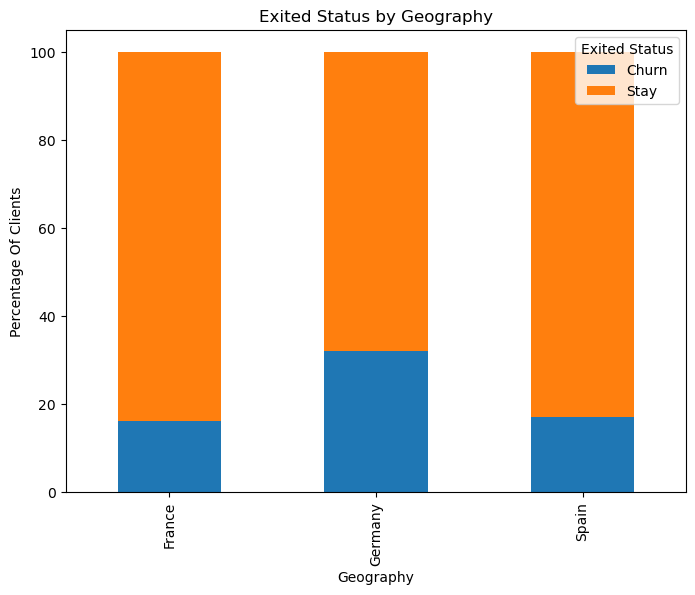

In [24]:
#plot bar chart of georaphy based on exited
data = pd.DataFrame({
    'Exited': [None, None, None],
    'Churn': [16, 32, 17],
    'Stay': [84, 68, 83] }, index=['France', 'Germany', 'Spain'])

# Plot a bar chart
data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.title('Exited Status by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage Of Clients')

# Display the legend
plt.legend(title='Exited Status', loc='upper right')

# Show the plot
plt.show()


In [25]:
import scipy.stats as stats

c, p, dof, expected = stats.chi2_contingency(ext_geo)
p.round(2)

0.0

 These figures offer insights into the retention dynamics in each country, highlighting variations in client behavior. The data suggests that Germany has a relatively higher proportion of clients leaving compared to France and Spain. Higher churn rates in Germany may indicate factors such as customer dissatisfaction or other business-related issues that might need attention.

## Comparing the mean of CreditScore between Female and Male Gender 

In [26]:
#Compute the mean creditscore of each class in gender
meanCreditScore_Gender = df.groupby('Gender',as_index=False)['CreditScore'].mean()
round(meanCreditScore_Gender,2)


,Gender,CreditScore
0,Female,650.83
1,Male,650.28


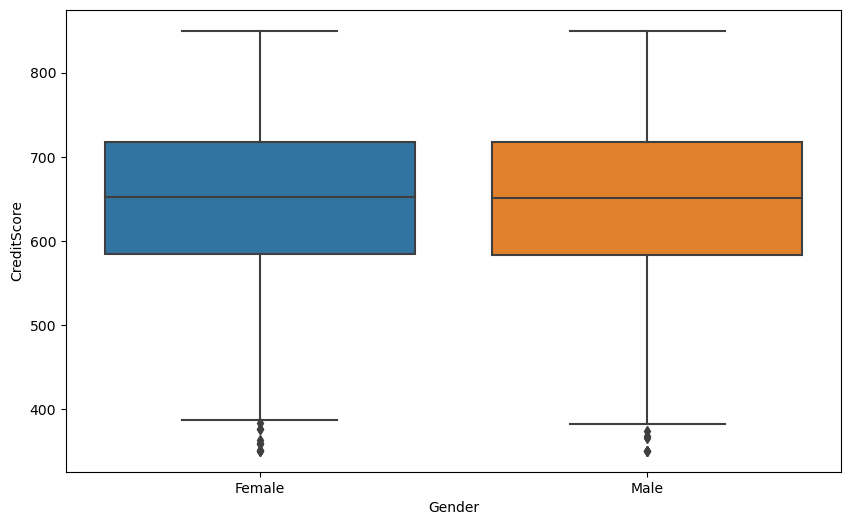

In [27]:
#Compare the CreditScore difference between Male and Female
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender',y='CreditScore',data=df)
plt.show()

#### Test the significant difference of mean of CreditScore between Female and Male gender using Independent t-test

In [28]:
#Check whether CreditScore for Female and Male have equal variance or not using Levene's Test
import scipy.stats as stats

stats.levene(df['CreditScore'][df['Gender']=='Female'],
             df['CreditScore'][df['Gender']=='Male'],
             center = 'mean')

LeveneResult(statistic=0.0038463214526727116, pvalue=0.9505491651289774)

In [29]:
#Evaluate Significant Difference of Mean of CreditScore between Female and Male using independent t-test
import scipy.stats as stats

stats.ttest_ind(df['CreditScore'][df['Gender']=='Female'],
             df['CreditScore'][df['Gender']=='Male'],equal_var=True)

TtestResult(statistic=0.2856346098463999, pvalue=0.7751639097068665, df=9998.0)

With a high p-value, you would typically fail to reject the null hypothesis. The result suggests that there is no significant difference between the groups. The t-statistic being close to zero indicates that the means of the two groups are close. Based on this result, there is insufficient evidence to suggest a significant difference between the compared groups. There isn't a gender-based distinction in credit scores. It does not imply that there is absolutely no difference, but rather that any observed differences are not large enough to be considered statistically significant.

## Did the Age influence Exited status of the client?

In [30]:
# Age influence on Exited status
age_exited = df.groupby('Exited',as_index=False)['Age'].mean().round(2)
age_exited


,Exited,Age
0,Churn,44.84
1,Stay,37.41


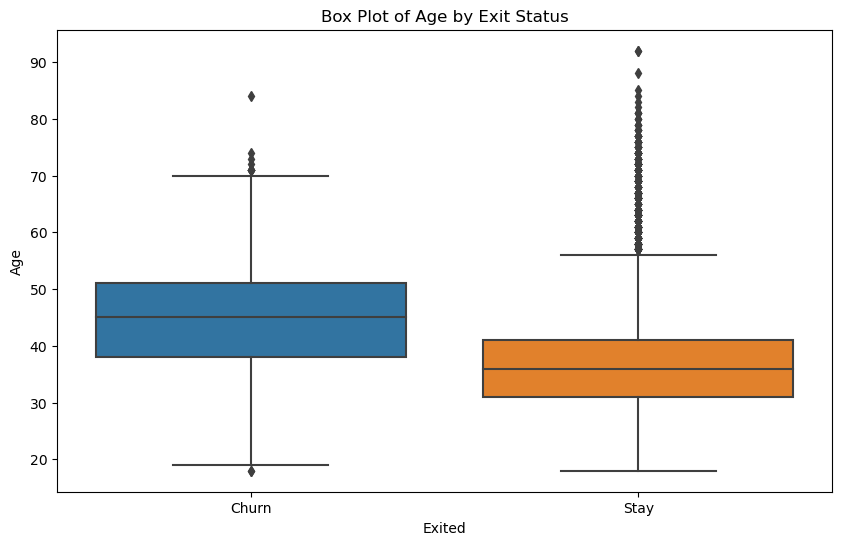

In [31]:
# Create a box plot
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='Exited', y='Age', data=df)


# Set plot labels and title
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Box Plot of Age by Exit Status')

# Show the plot
plt.show()


#### Test the significant difference of mean of Age and Exited status using Independent t-test

In [32]:
#Check whether Age and Exited have equal variance or not using Levene's Test
import scipy.stats as stats

stats.levene(df['Age'][df['Exited']=='Churn'],
             df['Age'][df['Exited']=='Stay'],
             center = 'mean')

LeveneResult(statistic=9.128972569564093, pvalue=0.0025222933821052586)

In [33]:
#Evaluate Significant Difference of Mean of Age and Exited using independent t-test
import scipy.stats as stats

stats.ttest_ind(df['Age'][df['Exited']=='Churn'],
             df['Age'][df['Exited']=='Stay'],equal_var=False)


TtestResult(statistic=30.419197204406792, pvalue=4.7127272656641046e-179, df=3248.052835708304)

With such a low p-value, we would typically reject the null hypothesis. In this context, it implies that there is a significant difference in Age between clients who exited and clients who stayed. Therefore, based on this t-test result, it can be concluded that Age does influence the Exited status of clients. The age of clients may be associated with a higher or lower likelihood of exiting the bank. 

## Did the CreditScore influence the Exited status of the client?

In [34]:
# CreditScore influence on Exited status
credit_score_exited = df.groupby('Exited',as_index=False)['CreditScore'].mean().round(2)
credit_score_exited



,Exited,CreditScore
0,Churn,645.35
1,Stay,651.85


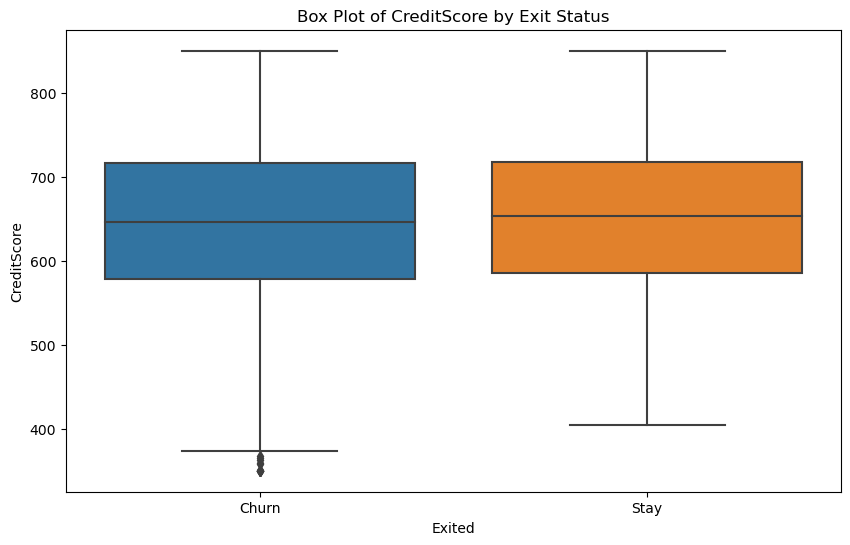

In [35]:
# Create a box plot
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='Exited', y='CreditScore', data=df)


# Set plot labels and title
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.title('Box Plot of CreditScore by Exit Status')

# Show the plot
plt.show()

#### Test the significant difference of mean of CreditScore and Exited status using Independent t-test

In [36]:
#Check whether CreditScore and Exited have equal variance or not using Levene's Test
import scipy.stats as stats

stats.levene(df['CreditScore'][df['Exited']=='Churn'],
             df['CreditScore'][df['Exited']=='Stay'],
             center = 'mean')

LeveneResult(statistic=5.500109918359457, pvalue=0.019034723520343893)

In [37]:
#Evaluate Significant Difference of Mean of CreditScore and Exited using independent t-test
import scipy.stats as stats

stats.ttest_ind(df['CreditScore'][df['Exited']=='Churn'],
             df['CreditScore'][df['Exited']=='Stay'],equal_var=False)

TtestResult(statistic=-2.6346605436575796, pvalue=0.008464728991832862, df=3050.895535490558)

 With a p-value close to zero, we would typically reject the null hypothesis. In this context, it implies that there is a significant difference in CreditScore between clients who exited and clients who stayed. Therefore, based on this t-test result, it can be concluded that CreditScore does influence the Exited status of clients. Lower credit scores may be associated with a higher likelihood of clients exiting the bank.

## Male or Female who are likely to churn

In [38]:
#Count of Gender based on Exited
crossTab = pd.crosstab(index=df['Gender'], columns=df['Exited'])
crossTab

Exited,Churn,Stay
Gender,,
Female,1139,3404
Male,898,4559


In [39]:
#Calculate Percentage of Gender based on Exited
crossTab= pd.crosstab(index=df['Gender'], columns=df['Exited'],normalize='index')*100
crossTab = round(crossTab)
crossTab

Exited,Churn,Stay
Gender,,
Female,25.0,75.0
Male,16.0,84.0


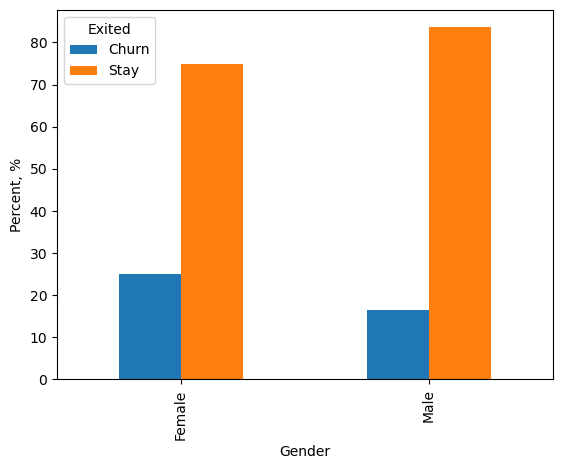

In [40]:
#Compare the Proportion of Male and Female by Exited using Bar Chart
crosstab = pd.crosstab(index=df['Gender'], columns=df['Exited'],normalize='index')*100
crosstab.plot(kind='bar')
plt.ylabel('Percent, %')
plt.show()

The churn rate (proportion of clients who exited) appears to be higher among females (1139 out of 3543 = 25%) compared to males (898 out of 5457 = 16%). This suggests that, based on the available data, a higher percentage of females have exited compared to males.

In [41]:
#compute chi square test
import scipy.stats as stats

c, p, dof, expected = stats.chi2_contingency(crossTab)
p.round()



0.0

The chi-square test results support the conclusion that there is a statistically significant association between the exit status and gender. This implies that the likelihood of a client exiting may be influenced by their gender.